<a href="https://colab.research.google.com/github/celeneheng/IS170_Binder/blob/2-Text-Mining-%26-NLP/YadiraValenzuela_jugraj_Dulay_Minji_KimWordcloud_cacao_review_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YadiraValenzuela, Jugraj Dulay, Minji Kim

wordCloud - wine review data 

In [ ]:
#start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving flavors_of_cacao2.csv to flavors_of_cacao2.csv


In [ ]:
#Load in the dataframe
df = pd.read_csv("flavors_of_cacao.csv", index_col=0) 

In [ ]:
#Looking at first 5 rows of the dataset
df.head()

,Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
Company (Maker-if known),,,,,,,,
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, A. Morin to Zotter
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Specific Bean Origin
or Bar Name  1795 non-null   object 
 1   REF                               1795 non-null   int64  
 2   Review
Date                       1795 non-null   int64  
 3   Cocoa
Percent                     1795 non-null   object 
 4   Company
Location                  1795 non-null   object 
 5   Rating                            1795 non-null   float64
 6   Bean
Type                         1794 non-null   object 
 7   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 190.8+ KB


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of cacao in this dataset such as {}... \n".format(len(df.REF.unique()), ", ".join(df.REF.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()), ", ".join(df.country.unique()[0:5])))

There are 1795 observations and 8 features in this dataset. 



TypeError: ignored

In [ ]:
df[["country", "description", "points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [ ]:
#Groupby by country
country = df.groupby("country")

#Summary statistic of all countries
country.describe().head()

points                       ... price               
                         count       mean       std  ...   50%    75%     max
country                                              ...                     
Argentina               3800.0  86.710263  3.179627  ...  17.0  25.00   230.0
Armenia                    2.0  87.500000  0.707107  ...  14.5  14.75    15.0
Australia               2329.0  88.580507  2.989900  ...  21.0  38.00   850.0
Austria                 3345.0  90.101345  2.499799  ...  25.0  36.50  1100.0
Bosnia and Herzegovina     2.0  86.500000  2.121320  ...  12.5  12.75    13.0

[5 rows x 16 columns]

In [ ]:
country.mean().sort_values(by="points", ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


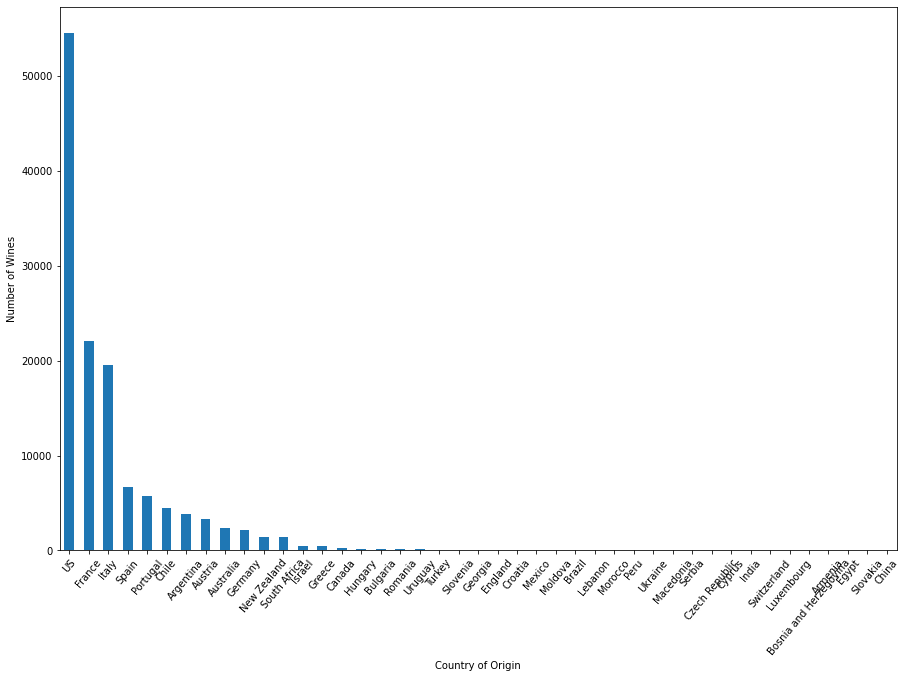

In [ ]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

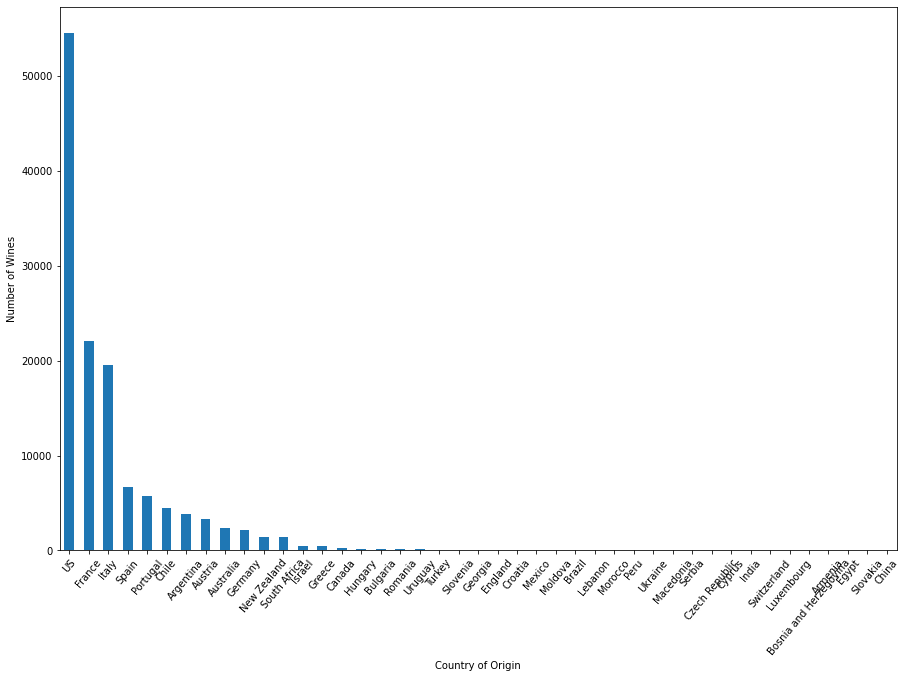

In [ ]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

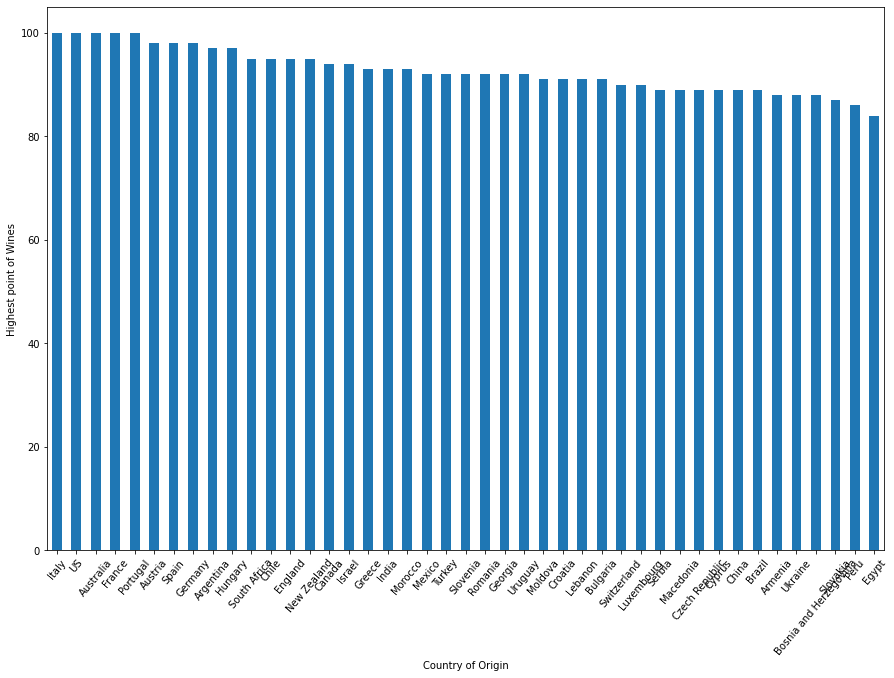

In [ ]:
plt.figure(figsize=(15,10))
country["points"].max().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [ ]:
# ?WordCloud


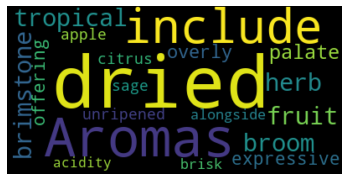

In [ ]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

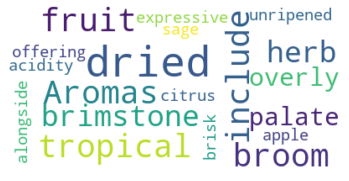

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the graphics/img folder:
wordcloud.to_file("sample_data/first_review.png")

In [ ]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


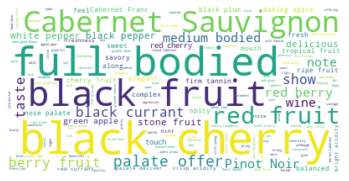

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wine_mask = np.array(Image.open("graphics/img/wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [ ]:
# Check the expected result of your mask
transformed_wine_mask 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

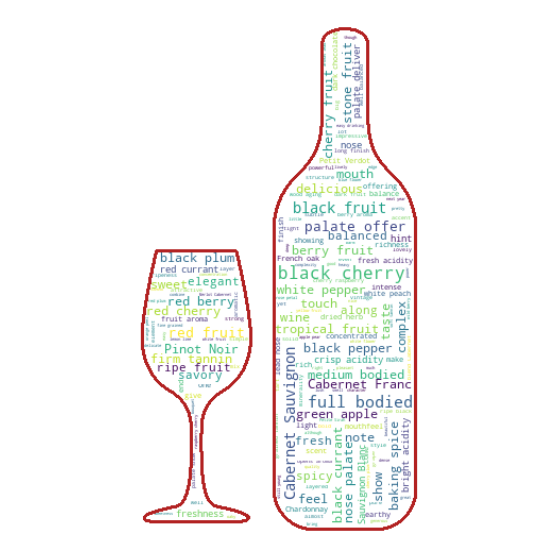

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask, 
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("graphics/img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# New Section